In [1]:
# using Google CoLab as my coding environment 
# checking the GPU 
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import os
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# data normalization
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y


# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

print("The shape of x_train", x_train.shape)
print("The shape of y_train", y_train.shape)
print("The shape of x_test", x_test.shape)
print("The shape of y_test", y_test.shape)

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step
The shape of x_train (50000, 3072)
The shape of y_train (50000, 10)
The shape of x_test (10000, 3072)
The shape of y_test (10000, 10)


In [0]:
# hyperparameters
LEARNING_RATE = 1e-3
EPOCHS = 100
BATCH_SIZE = 1024
DROPOUT = 0.1
MOMENTUM = 0.95

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, MaxPooling2D, MaxPool2D, BatchNormalization,AveragePooling2D, Dropout

# construction a model with dropout layer
def build_mlp(input_shape, output_units=10,DROPOUT=0.1):
    input_layer = keras.layers.Input(input_shape)
    model = Sequential()
    
    # layer 1
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(DROPOUT))
    
    # layer 2
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(DROPOUT))
    
    # layer 3
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(DROPOUT))
    
    # layer 4
    model.add(Dense(10))
    model.add(Activation('softmax'))

    return model

In [0]:
# import EarlyStopping from keras and set the monitor = val_acc
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_acc", 
                          patience=5, 
                          verbose=1
                          )

In [6]:
model = build_mlp(input_shape=x_train.shape[1:])
# model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop],
          verbose = 2
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

W0803 08:09:19.791517 140160082438016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0803 08:09:19.798302 140160082438016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 08:09:19.819036 140160082438016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0803 08:09:19.821083 140160082438016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0803 08:09:19.908762 140160082438016 deprecation_wrappe

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 4s - loss: 2.2760 - acc: 0.2067 - val_loss: 2.0584 - val_acc: 0.2719
Epoch 2/100
 - 1s - loss: 1.9157 - acc: 0.3200 - val_loss: 1.8271 - val_acc: 0.3560
Epoch 3/100
 - 1s - loss: 1.8089 - acc: 0.3602 - val_loss: 1.7409 - val_acc: 0.3893
Epoch 4/100
 - 1s - loss: 1.7493 - acc: 0.3794 - val_loss: 1.6794 - val_acc: 0.4100
Epoch 5/100
 - 1s - loss: 1.6952 - acc: 0.3984 - val_loss: 1.6433 - val_acc: 0.4247
Epoch 6/100
 - 1s - loss: 1.6591 - acc: 0.4132 - val_loss: 1.6163 - val_acc: 0.4314
Epoch 7/100
 - 1s - loss: 1.6229 - acc: 0.4257 - val_loss: 1.5876 - val_acc: 0.4414
Epoch 8/100
 - 1s - loss: 1.5985 - acc: 0.4350 - val_loss: 1.5653 - val_acc: 0.4484
Epoch 9/100
 - 1s - loss: 1.5702 - acc: 0.4439 - val_loss: 1.5497 - val_acc: 0.4546
Epoch 10/100
 - 1s - loss: 1.5461 - acc: 0.4530 - val_loss: 1.5298 - val_acc: 0.4594
Epoch 11/100
 - 1s - loss: 1.5288 - acc: 0.4563 - val_loss: 1.5108 - val_acc: 0.4624
Epoch 12/100
 - 1s - los

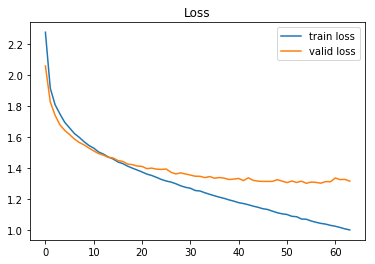

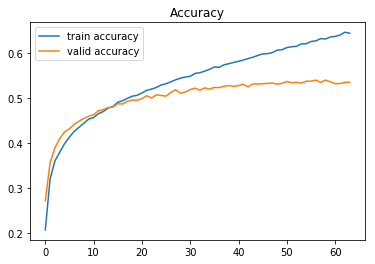

In [7]:
# plot the training result (training and validation)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 3s - loss: 2.2632 - acc: 0.2077 - val_loss: 2.1625 - val_acc: 0.2604
Epoch 2/100
 - 1s - loss: 1.9117 - acc: 0.3254 - val_loss: 1.8284 - val_acc: 0.3499
Epoch 3/100
 - 1s - loss: 1.8008 - acc: 0.3629 - val_loss: 1.7332 - val_acc: 0.3891
Epoch 4/100
 - 1s - loss: 1.7349 - acc: 0.3861 - val_loss: 1.6891 - val_acc: 0.4097
Epoch 5/100
 - 1s - loss: 1.6839 - acc: 0.4040 - val_loss: 1.6468 - val_acc: 0.4247
Epoch 6/100
 - 1s - loss: 1.6448 - acc: 0.4190 - val_loss: 1.6153 - val_acc: 0.4339
Epoch 7/100
 - 1s - loss: 1.6127 - acc: 0.4278 - val_loss: 1.5959 - val_acc: 0.4398
Epoch 8/100
 - 1s - loss: 1.5881 - acc: 0.4406 - val_loss: 1.5656 - val_acc: 0.4461
Epoch 9/100
 - 1s - loss: 1.5647 - acc: 0.4457 - val_loss: 1.5453 - val_acc: 0.4545
Epoch 10/100
 - 1s - loss: 1.5440 - acc: 0.4552 - val_loss: 1.5242 - val_acc: 0.4618
Epoch 11/100
 - 1s - loss: 1.5183 - acc: 0.4623 - val_loss: 1.5055 - val_acc: 0.4656
Epoch 12/100
 - 1s - los

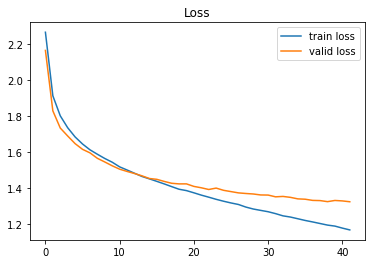

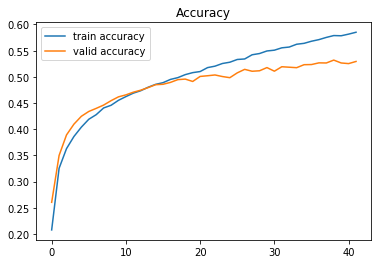

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 3s - loss: 2.2570 - acc: 0.2138 - val_loss: 2.1047 - val_acc: 0.2674
Epoch 2/100
 - 1s - loss: 1.9163 - acc: 0.3279 - val_loss: 1.8287 - val_acc: 0.3543
Epoch 3/100
 - 1s - loss: 1.8083 - acc: 0.3637 - val_loss: 1.7309 - val_acc: 0.3927
Epoch 4/100
 - 1s - loss: 1.7497 - acc: 0.3825 - val_loss: 1.6830 - val_acc: 0.4093
Epoch 5/100
 - 1s - loss: 1.7023 - acc: 0.3973 - val_loss: 1.6404 - val_acc: 0.4259
Epoch 6/100
 - 1s - loss: 1.6687 - acc: 0.4115 - val_loss: 1.6169 - val_acc: 0.4328
Epoch 7/100
 - 1s - loss: 1.6364 - acc: 0.4216 - val_loss: 1.5943 - val_acc: 0.4430
Epoch 8/100
 - 1s - loss: 1.6076 - acc: 0.4292 - val_loss: 1.5701 - val_acc: 0.4520
Epoch 9/100
 - 1s - loss: 1.5789 - acc: 0.4405 - val_loss: 1.5461 - val_acc: 0.4556
Epoch 10/100
 - 1s - loss: 1.5585 - acc: 0.4480 - val_loss: 1.5293 - val_acc: 0.4592
Epoch 11/100
 - 1s - loss: 1.5381 - acc: 0.4563 - val_loss: 1.5134 - val_acc: 0.4613
Epoch 12/100
 - 1s - los

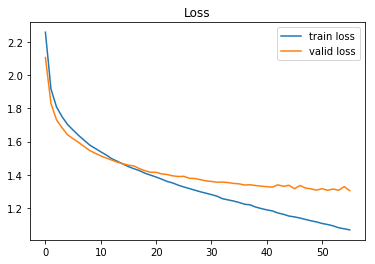

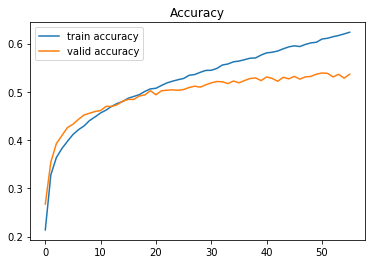

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 3s - loss: 2.3266 - acc: 0.2136 - val_loss: 2.0496 - val_acc: 0.2872
Epoch 2/100
 - 1s - loss: 1.9131 - acc: 0.3239 - val_loss: 1.8578 - val_acc: 0.3423
Epoch 3/100
 - 1s - loss: 1.8079 - acc: 0.3592 - val_loss: 1.7409 - val_acc: 0.3866
Epoch 4/100
 - 1s - loss: 1.7442 - acc: 0.3817 - val_loss: 1.6870 - val_acc: 0.4078
Epoch 5/100
 - 1s - loss: 1.6959 - acc: 0.3999 - val_loss: 1.6536 - val_acc: 0.4183
Epoch 6/100
 - 1s - loss: 1.6591 - acc: 0.4125 - val_loss: 1.6269 - val_acc: 0.4273
Epoch 7/100
 - 1s - loss: 1.6288 - acc: 0.4241 - val_loss: 1.6015 - val_acc: 0.4356
Epoch 8/100
 - 1s - loss: 1.6013 - acc: 0.4347 - val_loss: 1.5752 - val_acc: 0.4453
Epoch 9/100
 - 1s - loss: 1.5741 - acc: 0.4415 - val_loss: 1.5513 - val_acc: 0.4513
Epoch 10/100
 - 1s - loss: 1.5579 - acc: 0.4477 - val_loss: 1.5294 - val_acc: 0.4553
Epoch 11/100
 - 1s - loss: 1.5328 - acc: 0.4581 - val_loss: 1.5190 - val_acc: 0.4624
Epoch 12/100
 - 1s - los

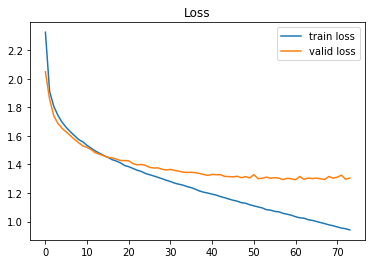

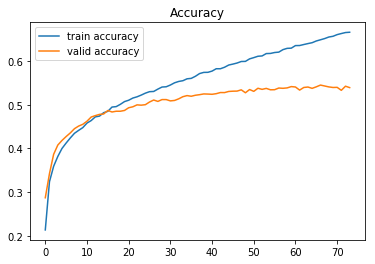

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 3s - loss: 2.2798 - acc: 0.2048 - val_loss: 2.1212 - val_acc: 0.2678
Epoch 2/100
 - 1s - loss: 1.9262 - acc: 0.3235 - val_loss: 1.8532 - val_acc: 0.3452
Epoch 3/100
 - 1s - loss: 1.8125 - acc: 0.3607 - val_loss: 1.7573 - val_acc: 0.3833
Epoch 4/100
 - 1s - loss: 1.7463 - acc: 0.3844 - val_loss: 1.6967 - val_acc: 0.4032
Epoch 5/100
 - 1s - loss: 1.6969 - acc: 0.3999 - val_loss: 1.6618 - val_acc: 0.4158
Epoch 6/100
 - 1s - loss: 1.6586 - acc: 0.4164 - val_loss: 1.6325 - val_acc: 0.4280
Epoch 7/100
 - 1s - loss: 1.6259 - acc: 0.4256 - val_loss: 1.5930 - val_acc: 0.4423
Epoch 8/100
 - 1s - loss: 1.6007 - acc: 0.4354 - val_loss: 1.5736 - val_acc: 0.4469
Epoch 9/100
 - 1s - loss: 1.5703 - acc: 0.4453 - val_loss: 1.5557 - val_acc: 0.4525
Epoch 10/100
 - 1s - loss: 1.5493 - acc: 0.4541 - val_loss: 1.5390 - val_acc: 0.4559
Epoch 11/100
 - 1s - loss: 1.5330 - acc: 0.4593 - val_loss: 1.5167 - val_acc: 0.4653
Epoch 12/100
 - 1s - los

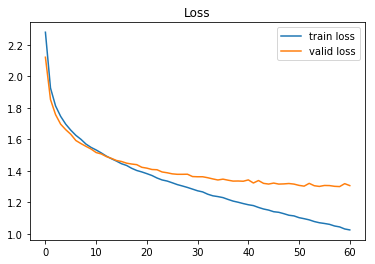

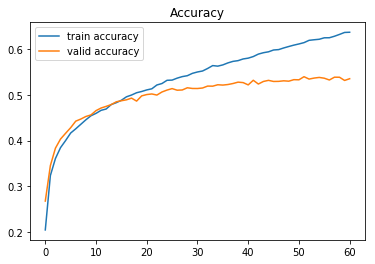

In [9]:
# change the value of patience to 10 and 25, respectively

patience= [3,5,7,9]
for pt in patience:
  earlystop = EarlyStopping(monitor="val_acc", 
                          patience=pt, 
                          verbose=1
                          )
  model = build_mlp(input_shape=x_train.shape[1:])
  # model.summary()
  optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
  model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

  model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop],
          verbose = 2
         )

  # Collect results
  train_loss = model.history.history["loss"]
  valid_loss = model.history.history["val_loss"]
  train_acc = model.history.history["acc"]
  valid_acc = model.history.history["val_acc"]
  
  # plot the training result (training and validation)
  import matplotlib.pyplot as plt
  %matplotlib inline

  plt.plot(range(len(train_loss)), train_loss, label="train loss")
  plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
  plt.legend()
  plt.title("Loss")
  plt.show()

  plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
  plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
  plt.legend()
  plt.title("Accuracy")
  plt.show()